# Clustering de Datos <img src="/Users/sandoval/Documents/data_mining/project/activities/input/fcfm.png" style="width: 80px;" style="float: right;"  align="right"  margin-right= "50px"/>

**Actividad 7**

N34 A2024 Minería de Datos

M.Sc. José Anastacio Hernández Saldaña

Ismael Sandoval Aguilar 

23 de noviembre de 2024

In [10]:
import pandas as pd
from utils import path_loader as p
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [11]:
# Load csv file
try:
    df = pd.read_csv(p.generate_file_path(
        file_name='avocado_prices_processed', file_extension='csv', directory='output'))

    n_row, n_col = df.shape
    print(f'CSV File loaded succesfully!\nThere are {n_row} rows and {n_col} columns')
except Exception as e:
    print(f'Something wrong happended!: {e}')

CSV File loaded succesfully!
There are 18249 rows and 13 columns


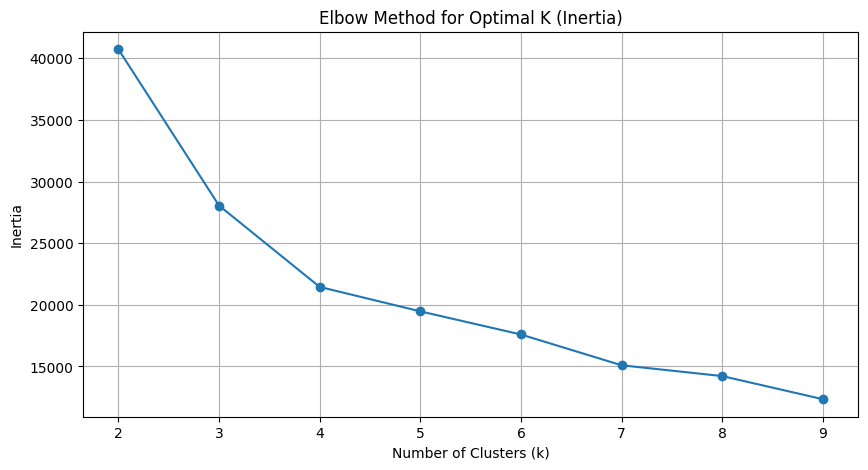

In [12]:
# Selecting features for clustering
X_clustering = df[['total_volume', '4046', '4225', '4770', 'total_bags', 'small_bags', 'large_bags', 'x_large_bags']]

# Standardizing the data for clustering
scaler = StandardScaler()
X_scaled_clustering = scaler.fit_transform(X_clustering)

# Using the elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_clustering)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled_clustering, kmeans.labels_))

# Plotting the elbow method (inertia)
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K (Inertia)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

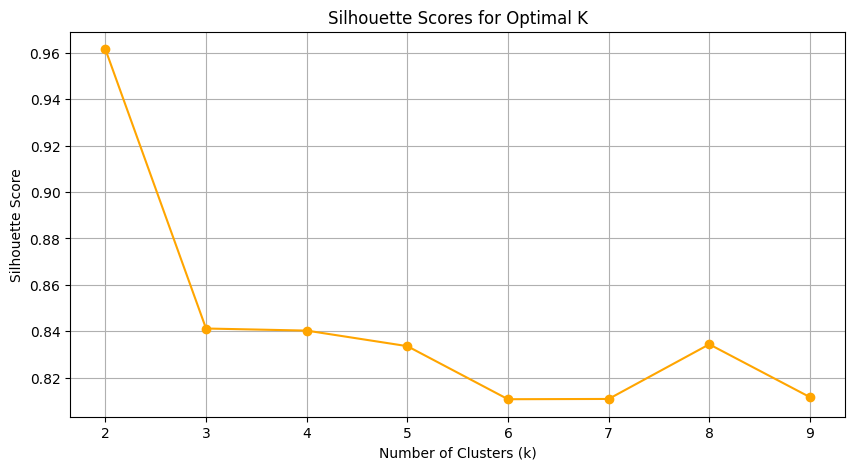

In [13]:
# Plotting silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()